In [28]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import trompy as tp

In [29]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("..\\figures")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\IPP Giulia paper\\figs")

save_figs = False

def tweak_df(df):

    df_nr = (df
             .query("diet == 'NR'")
             .map(lambda x: x * 3.4 / 2 if isinstance(x, (int, float)) else x)
    )

    df_pr = (df
             .query("diet == 'PR'")
             .map(lambda x: x * 4 / 2 if isinstance(x, (int, float)) else x)
    )

    return (pd
            .concat([df_nr, df_pr])
            .drop(columns=["cage"])
    )

df = pd.read_csv(DATAFOLDER / "foodintake.csv", sep=";")
df = tweak_df(df)

In [30]:
df

,diet,d01,d02,d03,d04,d05,d06,d07,d08,d09,d10,d11,d12,d13,d14,d15,d16
0,NR,91.8,86.7,86.7,86.7,90.1,79.9,79.9,88.4,71.4,95.2,78.2,83.3,83.3,73.1,78.2,78.2
1,NR,98.6,100.3,103.7,96.9,93.5,98.6,96.9,96.9,95.2,93.5,91.8,98.6,76.5,88.4,86.7,103.7
5,NR,96.9,91.8,93.5,90.1,91.8,86.7,91.8,95.2,93.5,91.8,86.7,96.9,86.7,88.4,93.5,90.1
7,NR,100.3,100.3,98.6,95.2,102.0,98.6,98.6,98.6,95.2,91.8,95.2,95.2,79.9,86.7,81.6,95.2
8,NR,88.4,95.2,88.4,85.0,79.9,90.1,91.8,86.7,86.7,91.8,85.0,83.3,93.5,83.3,68.0,90.1
10,NR,93.5,91.8,86.7,88.4,88.4,88.4,86.7,86.7,88.4,88.4,91.8,88.4,100.3,74.8,83.3,78.2
12,NR,90.1,88.4,81.6,76.5,93.5,81.6,86.7,79.9,83.3,86.7,85.0,86.7,81.6,90.1,76.5,78.2
2,PR,120.0,120.0,126.0,130.0,120.0,120.0,118.0,116.0,112.0,124.0,98.0,102.0,92.0,70.0,80.0,86.0
3,PR,132.0,120.0,116.0,122.0,106.0,112.0,106.0,98.0,106.0,98.0,80.0,76.0,64.0,54.0,62.0,100.0
4,PR,130.0,126.0,128.0,136.0,134.0,116.0,128.0,116.0,114.0,98.0,96.0,98.0,78.0,56.0,76.0,92.0


In [31]:
group_column = 'diet'  # Replace with the actual column name for grouping
x_columns = df.columns.difference([group_column])


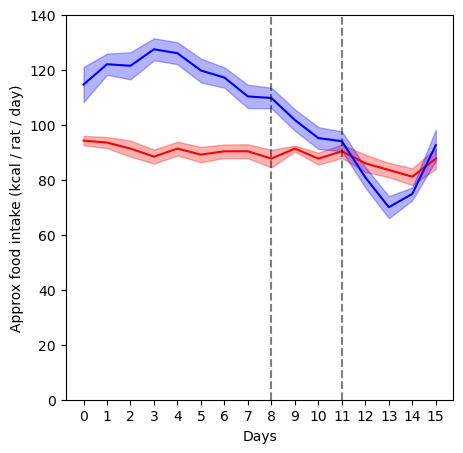

In [42]:
def plot_error(df, x_columns, ax=None, color="red"):

    mean = df[x_columns].mean()
    sem = df[x_columns].sem()
    x = np.arange(len(mean))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    
    ax.plot(mean, color=color)
    ax.fill_between(x, mean - sem, mean + sem, color=color, alpha=0.3)

f, ax = plt.subplots(1, 1, figsize=(5, 5))

df_nr = df.query("diet == 'NR'")
df_pr = df.query("diet == 'PR'")

plot_error(df_nr, x_columns, ax=ax, color="red")
plot_error(df_pr, x_columns, ax=ax, color="blue")

ax.set_xticks(np.arange(len(x_columns)), labels=np.arange(len(x_columns)))
ax.set_xlabel("Days")
ax.set_ylabel("Approx food intake (kcal / rat / day)")

ax.set_ylim(0, 140)

ax.axvline(8, color="black", linestyle="--", alpha=0.5)
ax.axvline(11, color="black", linestyle="--", alpha=0.5)



